In [1]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SOURCE = 'rattle.wav'
TARGET = ''

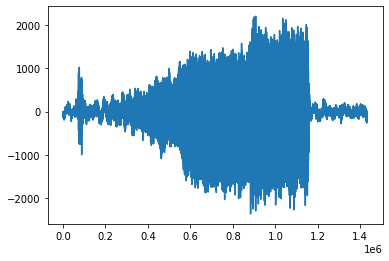

In [11]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
from scipy.io import wavfile
fs, data = wavfile.read(SOURCE)
sdata = np.array(data)
plt.plot(sdata)

In [3]:
import os
print(os.getcwd())
print(os.path.exists(SOURCE))

c:\workspace\autoencoder\sogang04-tensor
True


In [4]:
file = SOURCE
y, sr = librosa.load(file) # (default  sr=22050)
# Return
    # y: np.ndarray [shape=(n,) or (…, n)] / audio time series. Multi-channel is supported.
    # sr: number > 0 [scalar / sampling rate of
print("type(y): ", type(y))
print("y.shape: ", y.shape)
print("type(sr): ", type(sr))
print("sr: ", sr)

S = librosa.feature.melspectrogram(y=y, sr=sr)#, n_mels=128)
# Returns
    # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
print('type(S): ', type(S))
print("S.shape: ", S.shape)

type(y):  <class 'numpy.ndarray'>
y.shape:  (617101,)
type(sr):  <class 'int'>
sr:  22050
type(S):  <class 'numpy.ndarray'>
S.shape:  (128, 1206)


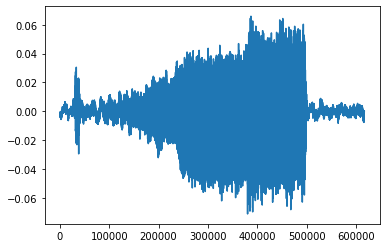

In [5]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
plt.plot(y)
# Time domain data를 그리게 된다.

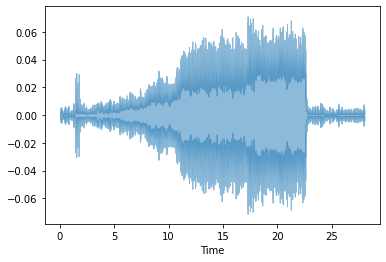

In [18]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
# https://librosa.org/doc/0.9.1/generated/librosa.display.waveshow.html#librosa.display.waveshow
# Visualize a waveform in the time domain
librosa.display.waveshow(y, alpha=0.5)

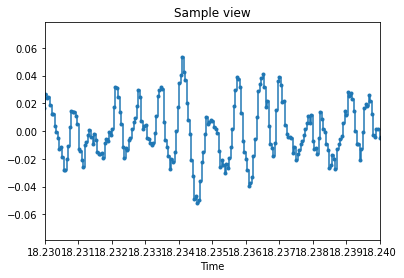

In [45]:
# https://www.dacon.io/competitions/official/235616/codeshare/1277
# https://librosa.org/doc/0.9.1/generated/librosa.display.waveshow.html#librosa.display.waveshow
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set(xlim=[18.23, 18.24], title='Sample view')#, ylim=[-0.2, 0.2])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
ax.label_outer()
#Rax.legend()

In [80]:
# Short Time Fourier Transform
# 음원 데이터를 특정 시간 간격으로 쪼갠 뒤, 해당 간격에 있는 파형에 대해 퓨리에 변환을 적용함으로써 주파수 분석을 하는 것
# 출처: https://hyongdoc.tistory.com/401?category=884319 [Doony Garage]

# https://librosa.org/doc/0.9.1/generated/librosa.stft.html?highlight=librosa%20stft#librosa.stft
# librosa.stft(y, *, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=None, pad_mode='constant')

# n_fft=: win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터입니다. Default n_fft=2048
# hop_length: 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지에 대한 파라미터입니다. 즉, 칼라맵의 시간 주기
# win_length: FFT를 할 때 참조할 그래프의 길이, default는 n_fft와 같습니다.
# S = np.abs(librosa.stft(y, n_fft=2048, hop_length=None, win_length=2048))
S = np.abs(librosa.stft(y))

In [96]:
import urllib3
import matplotlib.pyplot as plt
f = urllib3.urlopen("https://kr.mathworks.com/help/dsp/ref/stft_output.png")

AttributeError: module 'urllib3' has no attribute 'urlopen'

In [81]:
# Use left-aligned frames, instead of centered frames
S_left = librosa.stft(y, center=False)

In [82]:
# Use a shorter hop length
D_short = librosa.stft(y, hop_length=64)

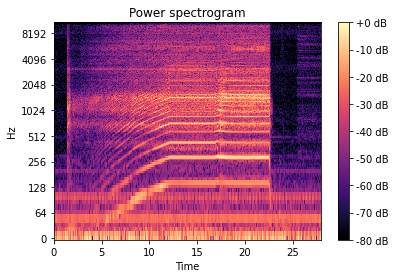

In [83]:
#Display a spectrogram

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [5]:
Sdefault = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# Returns
    # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
print('type(S): ', type(Sdefault))
print("S.shape: ", Sdefault.shape)

type(S):  <class 'numpy.ndarray'>
S.shape:  (128, 1206)


In [6]:
S256 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
# Returns
    # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
print('type(S): ', type(S256))
print("S.shape: ", S256.shape)

type(S):  <class 'numpy.ndarray'>
S.shape:  (256, 1206)


In [ ]:
librosa.display.specshow(y)

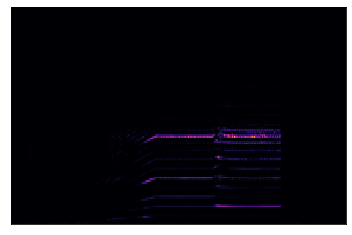

In [7]:
librosa.display.specshow(S)


In [ ]:
S_dB = librosa.power_to_db(S, ref=np.max)

In [ ]:
if TARGET == '':
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.title('mel power spectrogram')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()
    plt.show()
else:
    fig = plt.figure(figsize=(15, 15))
    plt.axis('off')
    librosa.display.specshow(S_dB, sr=sr)
    plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)
    plt.close(fig) 
